In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import heapq
from pathlib import Path

sns.set_palette("pastel", 9)
#husl

In [111]:
def save(title):
    plt.savefig(f'report/images/{title}.pdf', format='pdf', bbox_inches='tight')

In [112]:
file_path = Path('adults_data','adults_imputed_train_data.csv')

df = pd.read_csv(file_path)
"""df['income'] = df['income'].replace({0:"<=50K",
                                     1:">50K"})"""       
df.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
0,18-24,Federal-gov,10.0,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0.0,40.0,United-States,0
1,61-70,Self-emp-inc,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,40.0,United-States,0
2,25-30,Private,10.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,40.0,United-States,0
3,31-40,Private,13.0,Married-civ-spouse,Exec-managerial,Other-relative,White,Male,3411.0,47.0,United-States,0
4,31-40,Private,9.0,Married-civ-spouse,Sales,Wife,White,Female,0.0,30.0,United-States,0


In [113]:
colors = sns.color_palette("Greens", len(df.columns))
colors[5]
colors

[(0.9265513264129182, 0.9718723567858516, 0.9116955017301038),
 (0.8717416378316033, 0.9502652825836218, 0.8503806228373703),
 (0.797923875432526, 0.9207381776239908, 0.7716416762783544),
 (0.7137716262975778, 0.8856747404844291, 0.6880738177623991),
 (0.6182237600922723, 0.8448442906574395, 0.5970319108035371),
 (0.5074971164936563, 0.7931718569780853, 0.5059900038446752),
 (0.3952941176470588, 0.7394079200307574, 0.43352556708958095),
 (0.2698039215686274, 0.6778931180315263, 0.37201076509034986),
 (0.18985005767012686, 0.601199538638985, 0.3126643598615917),
 (0.11680123029604011, 0.5275663206459055, 0.25597846981930034),
 (0.030680507497116496, 0.45374855824682814, 0.19446366782006919),
 (0.0, 0.3625067281814687, 0.14562091503267974)]

### Visualization functions

In [114]:
def general_info(df):
    print("################### Shape #################### \n", df.shape, "\n")
    print("################### Info ####################")
    df.info()
    print("\n", "################### Unique values #################### \n", df.nunique(), "\n")
    print("################### Nulls #################### \n", df.isnull().sum(axis=0), "\n")
    print("################### Description #################### \n")
    return df.describe().T


def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    sns.countplot(df, x=df[column], hue = df[compare_column], palette='Greens', gap=0.05, 
                  stat=stat, order=order)
    plt.title(f'{compare_column} distribution in every {column} class')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()


def count_grouped_plot(df, column, groupby):
    plt.figure(figsize=(12,6))
    mean_values = df.groupby(groupby)[column].mean().reset_index()
    ax = sns.barplot(x=groupby, y=column, data=mean_values, color="#03C04A")
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    #plt.title(f'Mean {column} for every {groupby} class')
    plt.xticks(rotation=60)
    plt.legend()

def count_99_grouped(df, value, column, compare_column):
    df = df[[column, compare_column]]
    df_reduced = df[df[column] == value]
    df_reduced = df_reduced.groupby(compare_column).count()
    sns.countplot(df_reduced, x=df_reduced[compare_column])
    
    

def count_labels(data, x_column, stat="count", ax=None, rotat=60, minority=False,
                 xint=False, order=None, hue=False):
    colors = sns.color_palette("Greens", len(df.columns))

    if xint:
        data[x_column] = data[x_column].astype(int)
    
    if hue:
        ax = sns.countplot(data=data, x=x_column, hue=hue, stat=stat, 
                            palette="Greens", legend=True, ax=ax, order=order)
    else:
        ax = sns.countplot(data=data, x=x_column, stat=stat, 
                           color=colors[5], ax=ax, order=order)

    
    
    if stat == "count":
        plt.ylabel("Count")
        for p in ax.patches:
            ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    if stat == "percent":
        plt.ylabel("Percentage")
        if minority:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')
        else:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')
        
        
    ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)
    ax.set_ylim(1, ax.get_ylim()[1]) 

    #plt.title("Income Percentage Distribution")
            
#03C04A - parakeet
#03AC13" - shamrock
#028A0F - emerald


In [115]:
def remove_leading_space(value):
    if isinstance(value, str) and value.startswith(' '):
        return value.lstrip()
    else:
        return value

In [116]:
raw_path = Path('adults_data','adults_raw_train_data.csv')
imputed = pd.read_csv(Path('adults_data','adults_imputed_train_data.csv'))

df_raw = pd.read_csv(raw_path) 
df_raw['income'] = df_raw['income'].replace({"<=50K.":"<=50K",
                                            ">50K.": ">50K"})

df_raw = df_raw.map(remove_leading_space)
df_raw = df_raw.replace("?", np.nan)

df_raw.to_csv(Path("adults_data","adults_raw_nan_train_data.csv"), index=None)


In [117]:
df_uni_cols = df_raw.copy()
df_uni_cols['capital'] = df_uni_cols['capital-gain'] - df_uni_cols['capital-loss']
df_uni_cols.pop('capital-gain')
df_uni_cols.pop('capital-loss')
df_uni_cols.pop('education')

df_uni_cols.to_csv(Path("adults_data","adults_raw_uni_train_data.csv"), index=None)

In [118]:
df_raw['income'].value_counts()

income
<=50K    29737
>50K      9336
Name: count, dtype: int64

In [119]:
colors = sns.color_palette("Greens", len(df.columns))
colors

[(0.9265513264129182, 0.9718723567858516, 0.9116955017301038),
 (0.8717416378316033, 0.9502652825836218, 0.8503806228373703),
 (0.797923875432526, 0.9207381776239908, 0.7716416762783544),
 (0.7137716262975778, 0.8856747404844291, 0.6880738177623991),
 (0.6182237600922723, 0.8448442906574395, 0.5970319108035371),
 (0.5074971164936563, 0.7931718569780853, 0.5059900038446752),
 (0.3952941176470588, 0.7394079200307574, 0.43352556708958095),
 (0.2698039215686274, 0.6778931180315263, 0.37201076509034986),
 (0.18985005767012686, 0.601199538638985, 0.3126643598615917),
 (0.11680123029604011, 0.5275663206459055, 0.25597846981930034),
 (0.030680507497116496, 0.45374855824682814, 0.19446366782006919),
 (0.0, 0.3625067281814687, 0.14562091503267974)]

In [120]:
general_info(df)

################### Shape #################### 
 (36822, 12) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36822 entries, 0 to 36821
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36822 non-null  object 
 1   workclass       36822 non-null  object 
 2   education-num   36822 non-null  float64
 3   marital-status  36822 non-null  object 
 4   occupation      36822 non-null  object 
 5   relationship    36822 non-null  object 
 6   race            36822 non-null  object 
 7   sex             36822 non-null  object 
 8   capital         36822 non-null  float64
 9   hours-per-week  36822 non-null  float64
 10  region          36822 non-null  object 
 11  income          36822 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 3.4+ MB

 ################### Unique values #################### 
 age                 8
workclass

,count,mean,std,min,25%,50%,75%,max
education-num,36822.0,10.135544,2.556648,1.0,9.0,10.0,13.0,16.0
capital,36822.0,1041.472136,7673.805087,-4356.0,0.0,0.0,0.0,99999.0
hours-per-week,36822.0,40.948808,12.028255,1.0,40.0,40.0,45.0,99.0
income,36822.0,0.247814,0.431749,0.0,0.0,0.0,0.0,1.0


In [121]:
dups = df[df.duplicated(subset=['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'], keep=False)]

grouped_dups = dups.groupby(['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'])["income"].nunique()

#grouped_dups[grouped_dups >1]
grouped_dups

age   workclass         education-num  marital-status      occupation         relationship  race   sex     capital  hours-per-week  region       
0-17  Private           6.0            Never-married       Handlers-cleaners  Own-child     White  Male    0.0      15.0            United-States    1
                                                                                                                    20.0            United-States    1
                                                           Other-service      Own-child     Black  Male    0.0      15.0            United-States    1
                                                                                            White  Female  0.0      15.0            United-States    1
                                                                                                                    25.0            United-States    1
                                                                                                   

## Boxploty

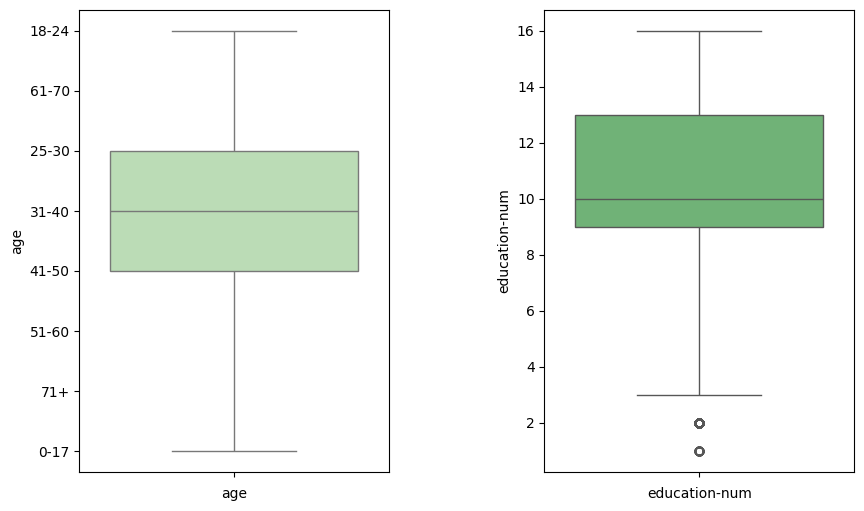

In [122]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5)
 
# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['age'], ax=ax[0], color=colors[3],)
ax[0].set_xlabel('age')
 
 
# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['education-num'], ax=ax[1], color=colors[6])
ax[1].set_xlabel('education-num')
 
# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    

# Raw visualizations (uni cols)

In [123]:
colors2 = [colors[4], colors[2]]

## NaN visualization

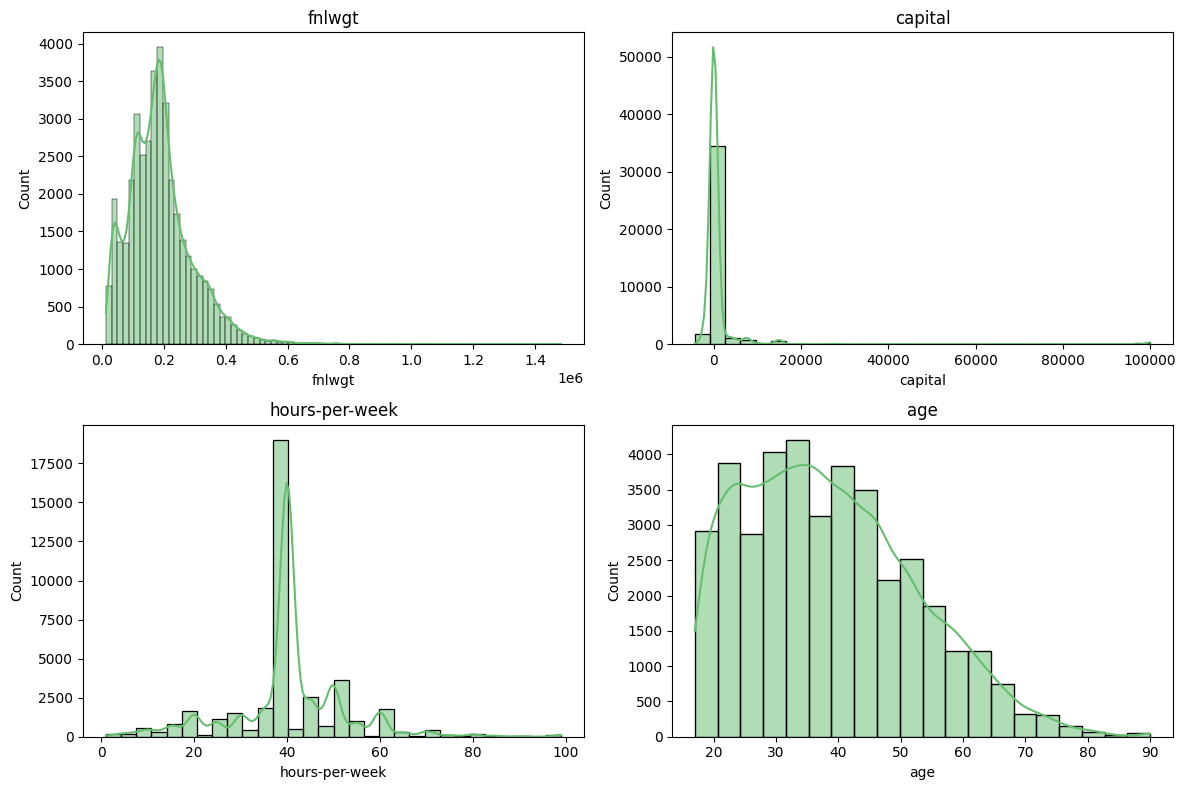

In [124]:
numerical_features = ['fnlwgt', 'capital', 'hours-per-week', 'age']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.title(feature)

    if i == 1:
        sns.histplot(df_uni_cols[feature], kde=True, color=colors[6], bins=80)
    
    elif i == 2:
        sns.histplot(df_uni_cols[feature], kde=True, color=colors[6], bins=30)
        
    elif i == 3:
        sns.histplot(df_uni_cols[feature], kde=True, color=colors[6], bins=30)
        
    else:
        sns.histplot(df_uni_cols[feature], kde=True, color=colors[6], bins=20)
    
plt.tight_layout()
save('uni_histplots')
plt.show()

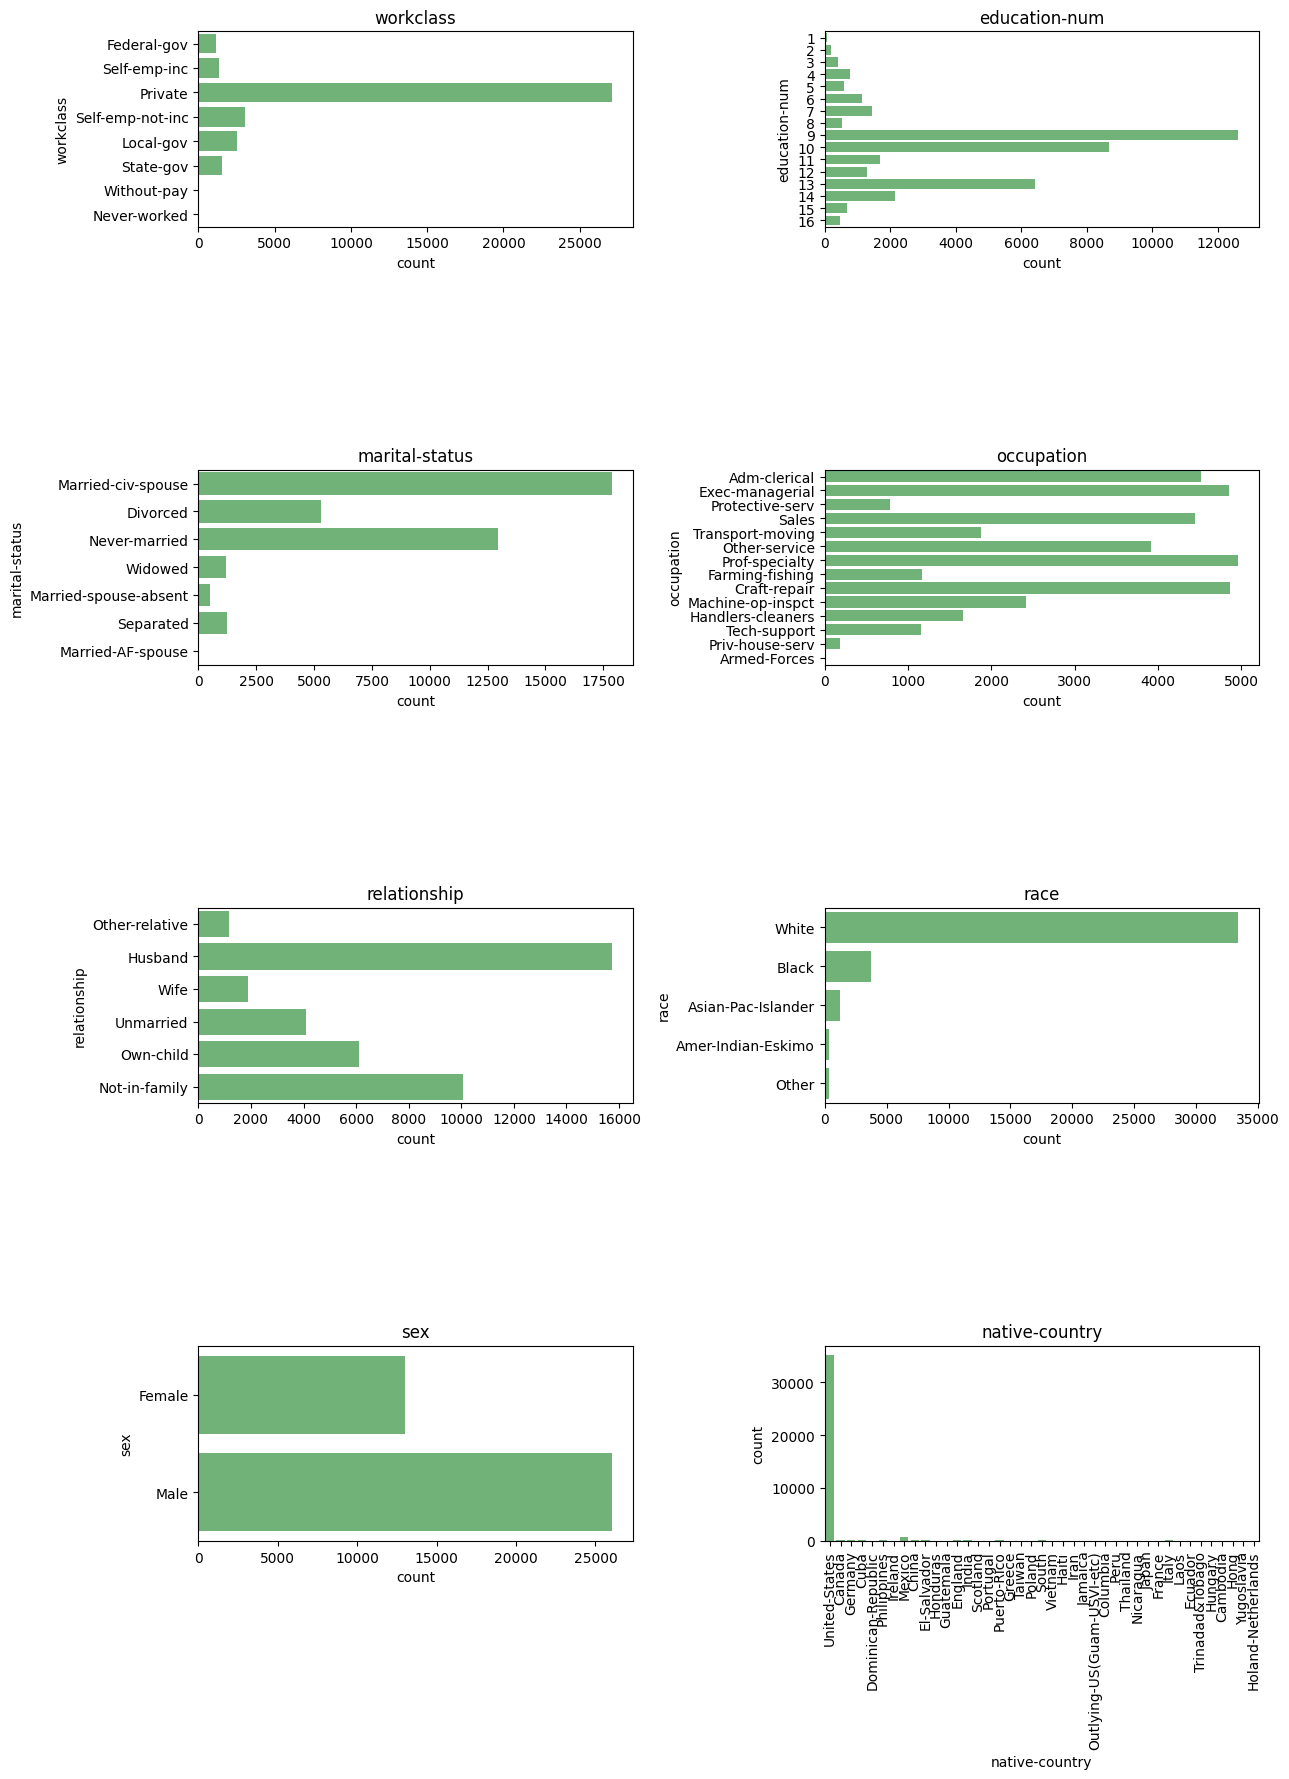

In [125]:
categorical_features = ['workclass', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(13, 20))
#plots without country
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    
    plt.title(feature)
    plt.ylabel(None)
    
    if i < len(categorical_features):
        sns.countplot(data=df_uni_cols, y=feature, color = colors[6])       # can do stat="percent"
        
    if i == len(categorical_features):
        sns.countplot(data=df_uni_cols, x=feature, color = colors[6])
        plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.tight_layout()
save('categorical_uni')
plt.show()

In [126]:
def map_no_usa(row):
    
    if row == "United-States":
        return "USA"
    else: 
        return "other"

In [127]:
no_usa = df_uni_cols.copy()
no_usa['no-usa'] = no_usa['native-country'].apply(lambda x: map_no_usa(x))

In [128]:
df_uni_cols[df_uni_cols['hours-per-week'] >= 80].shape

(421, 13)

In [129]:
df_uni_cols.shape

(39073, 13)

In [130]:
421/39073

0.010774703759629412

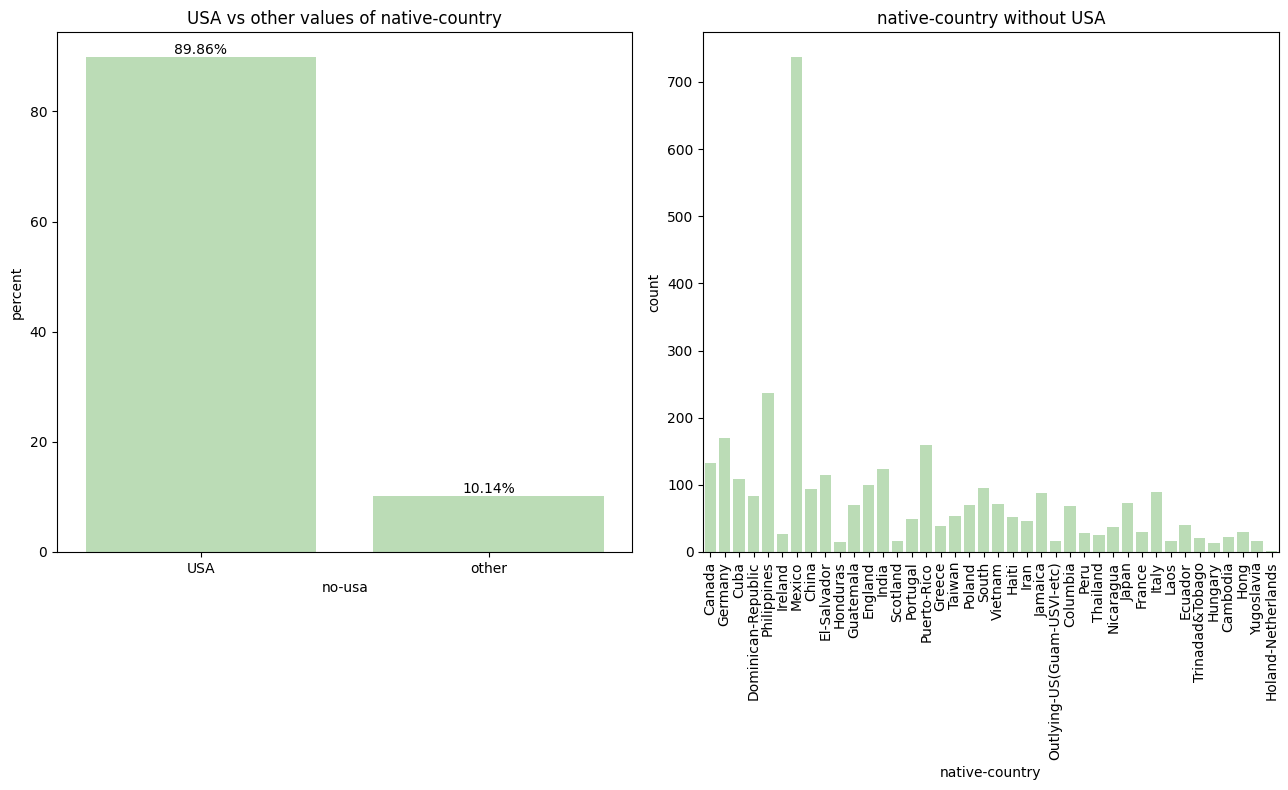

In [131]:
fix, axes = plt.subplots(1, 2, figsize=(13, 8))
for i, usa in enumerate([True, False]):
    plt.subplot(1,2,i+1)
    plt.ylabel(None)

    if usa:
        ax = sns.countplot(data = no_usa, 
                      x = 'no-usa',
                      stat="percent", color=colors[3])
        plt.title("USA vs other values of native-country")
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        plt.xticks(rotation=0)

    else:
        sns.countplot(data = df_uni_cols[df_uni_cols['native-country'] != 'United-States'], 
                      x = categorical_features[-1], color=colors[3])
        plt.title(categorical_features[-1] + ' without USA')
        plt.xticks(rotation=90)

        
plt.tight_layout()
save("no_usa")
plt.show()

In [132]:
num_feat = imputed.select_dtypes(include="number").columns.to_list()

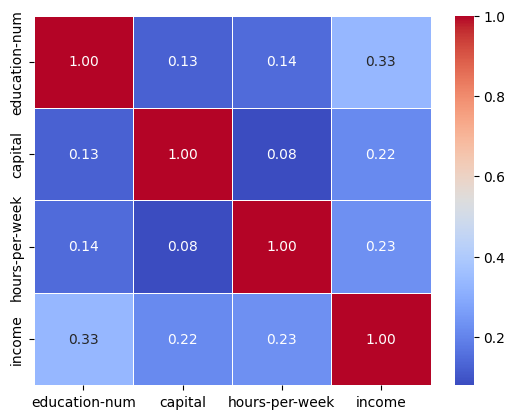

In [133]:
sns.heatmap(df[num_feat].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlation Matrix Heatmap')
save('corr_mtrx')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\3989729042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="income", stat="percent", palette="Greens")


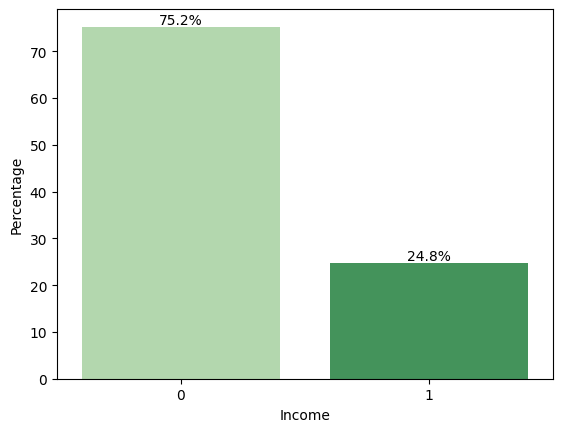

In [134]:
ax = sns.countplot(data=df, x="income", stat="percent", palette="Greens")
plt.ylabel("Percentage")
plt.xlabel("Income")
#plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
save("distr_clean")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


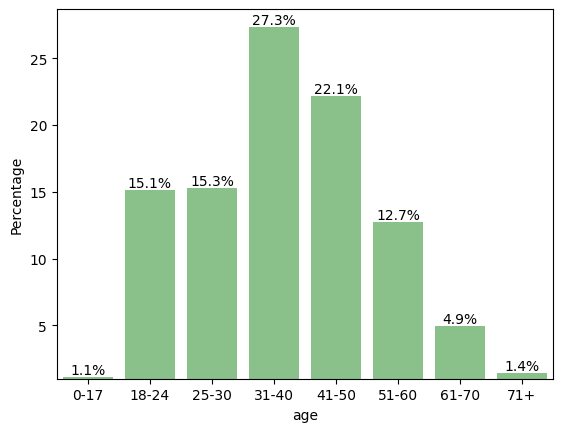

In [135]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
count_labels(df, "age", "percent", order = labels_age, rotat=0)
save("age_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


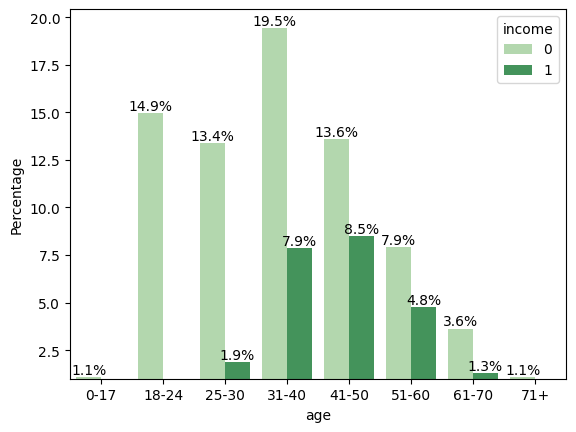

In [136]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
count_labels(df, "age", "percent", order = labels_age, rotat=0, hue="income")
save("age_bar_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


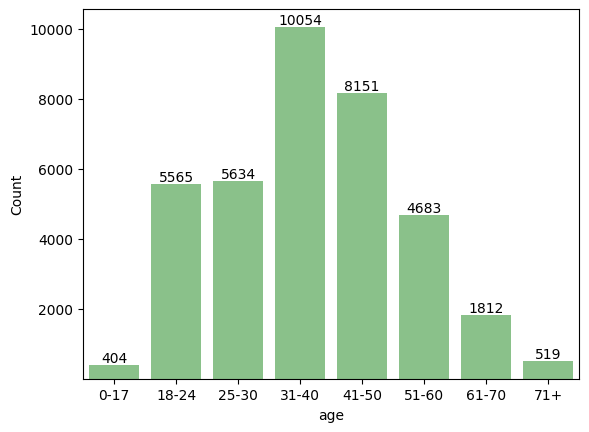

In [137]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
count_labels(df, "age", "count", order = labels_age, rotat=0)
save("age_range")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


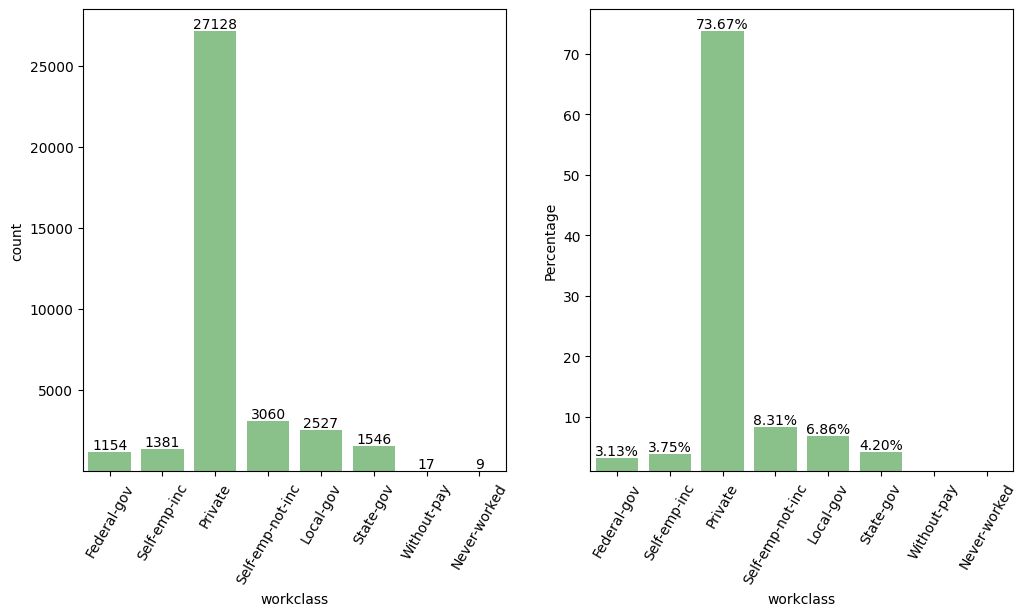

In [138]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
count_labels(df, "workclass", "count",ax=axes[0])
count_labels(df, "workclass", "percent",ax=axes[1], minority=True)
save("workclass_cp")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


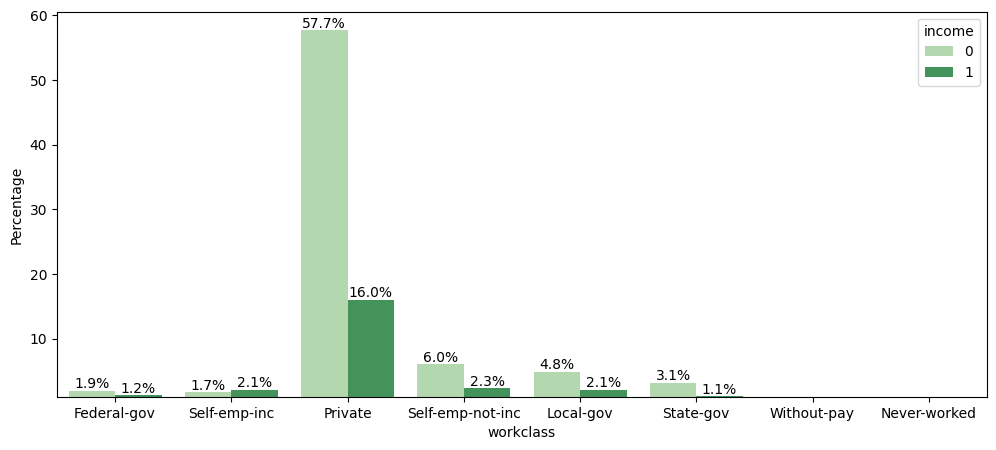

In [139]:
plt.figure(figsize=(12,5))
count_labels(df, "workclass", "percent", rotat=0, hue="income")
save("workclass_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


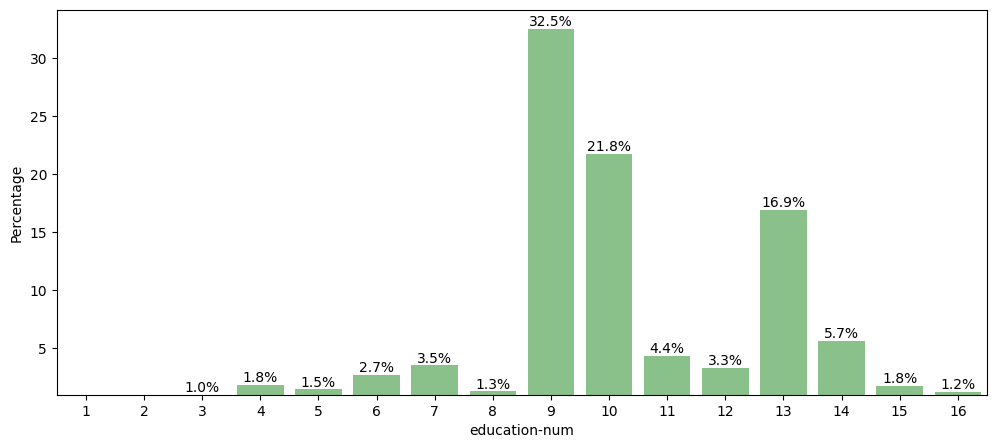

In [140]:
plt.figure(figsize=(12,5))
count_labels(df, "education-num", "percent", xint=True, rotat=0)
save("edu_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


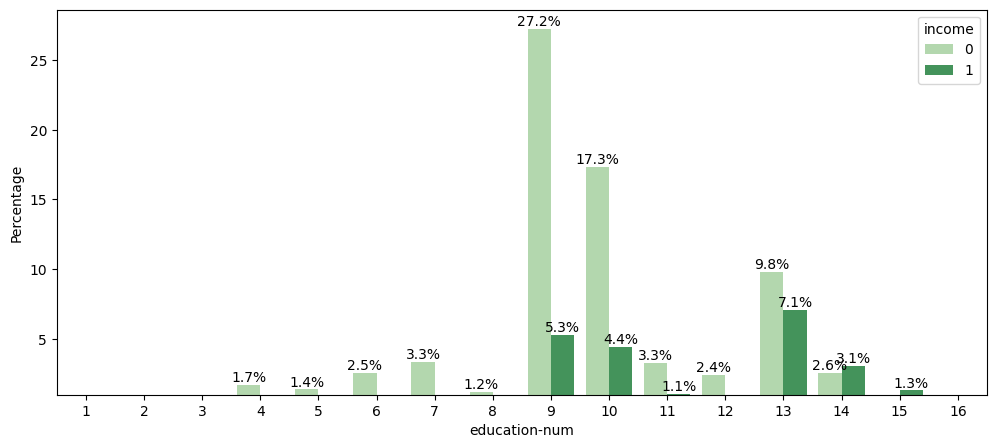

In [141]:
plt.figure(figsize=(12,5))
count_labels(df, "education-num", "percent", xint=True, rotat=0, hue="income")
save("edu_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


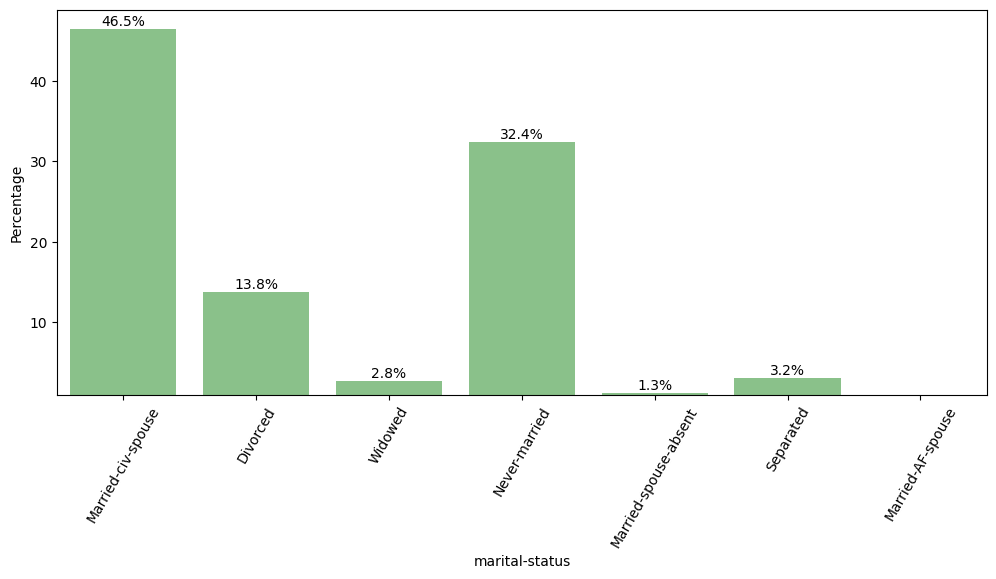

In [142]:
plt.figure(figsize=(12,5))
count_labels(df, "marital-status", "percent")
save("marital_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


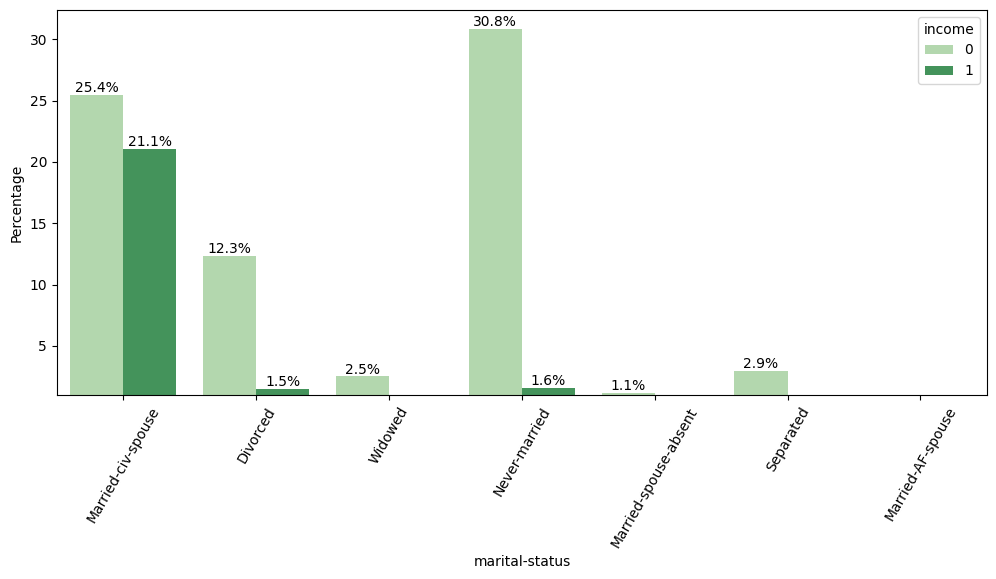

In [143]:
plt.figure(figsize=(12,5))
count_labels(df, "marital-status", "percent", hue="income")
save("marital_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


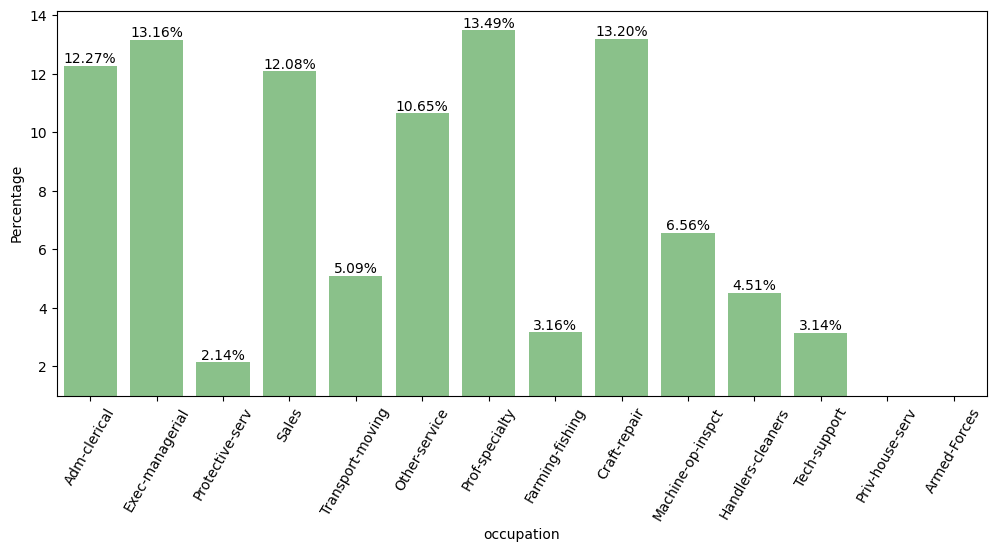

In [144]:
plt.figure(figsize=(12,5))
count_labels(df, "occupation", "percent", minority=True)
save("occupation_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


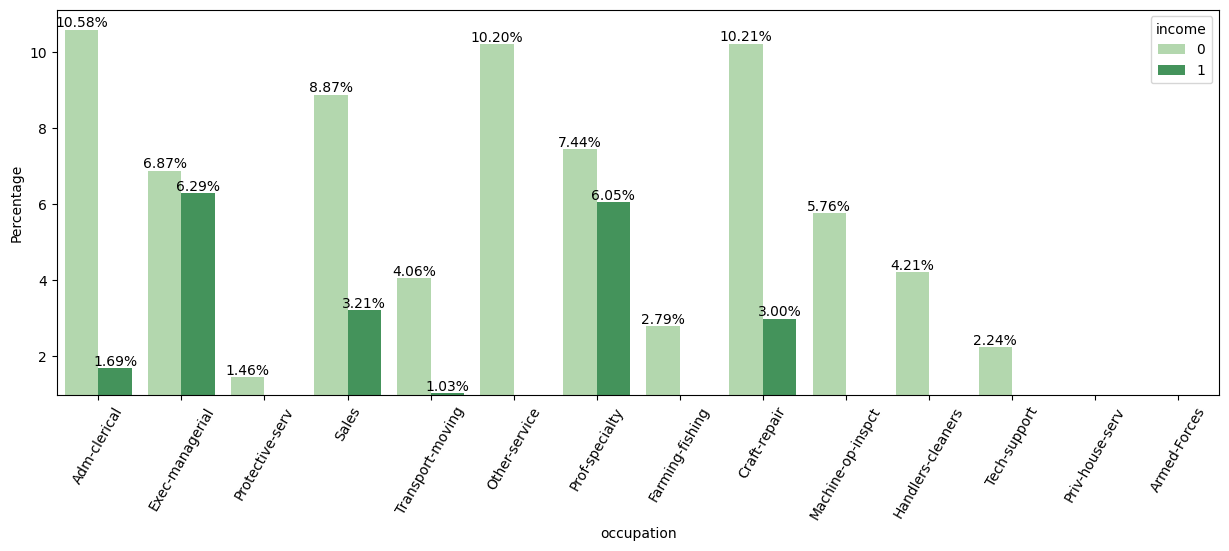

In [145]:
plt.figure(figsize=(15,5))
count_labels(df, "occupation", "percent", minority=True, hue="income")
save("occupation_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


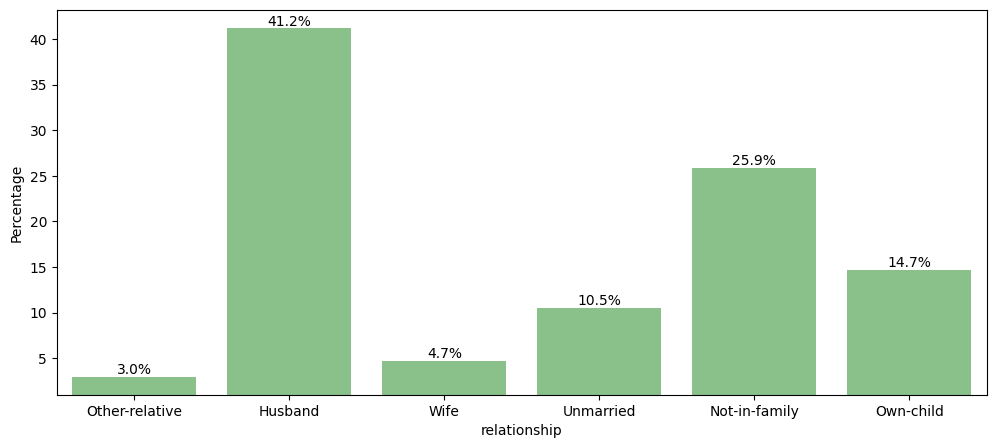

In [146]:
plt.figure(figsize=(12,5))
count_labels(df, "relationship", "percent", rotat=0)
save("relationsip_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


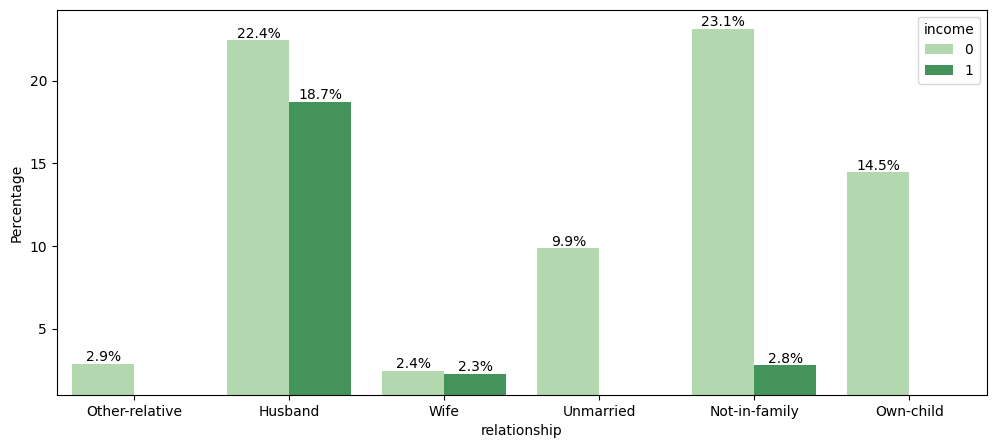

In [147]:
plt.figure(figsize=(12,5))
count_labels(df, "relationship", "percent", rotat=0, hue="income")
save("relationsip_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


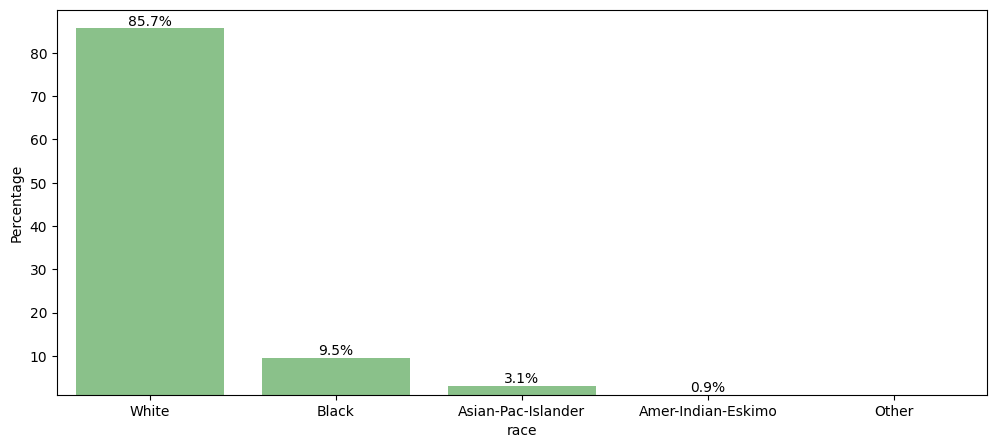

In [148]:
plt.figure(figsize=(12,5))
count_labels(df, "race", "percent", rotat=0)
save("race_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


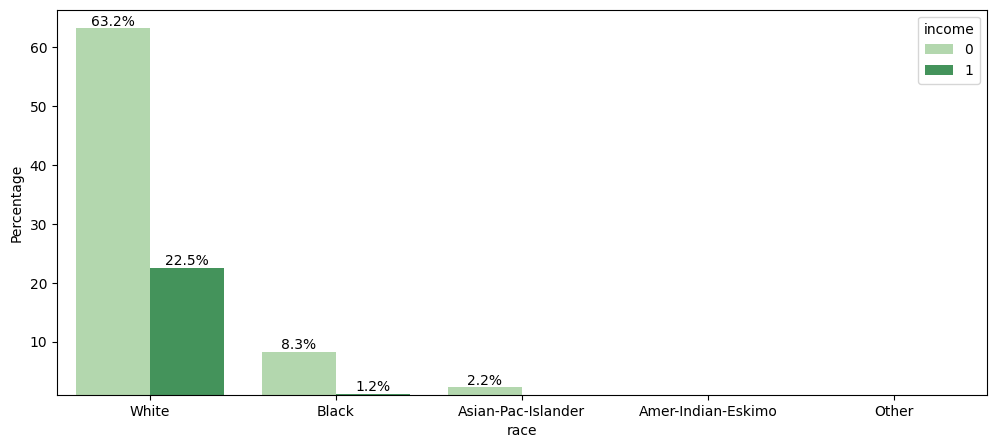

In [149]:
plt.figure(figsize=(12,5))
count_labels(df, "race", "percent", rotat=0, hue="income")
save("race_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


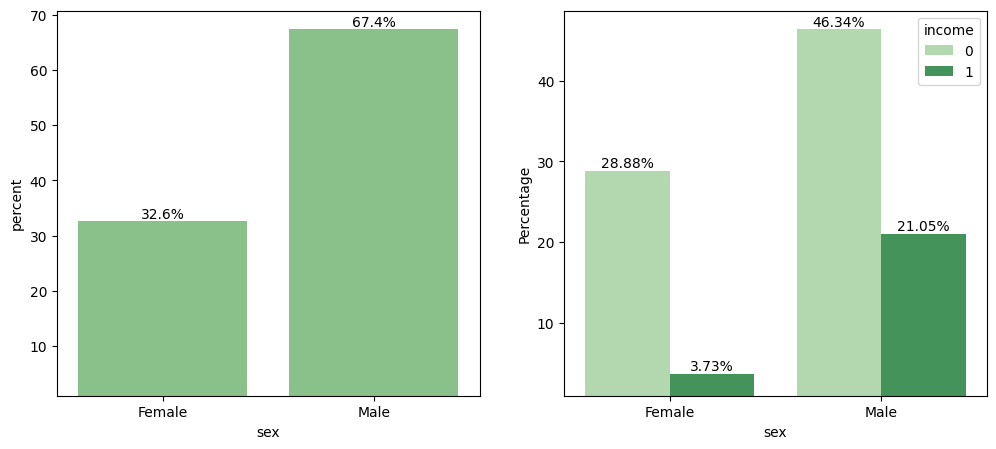

In [150]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
count_labels(df, "sex", "percent", rotat=0, hue="income", ax=axes[1], minority=True)
count_labels(df, "sex", "percent", rotat=0, ax=axes[0])
save("sex_bars")

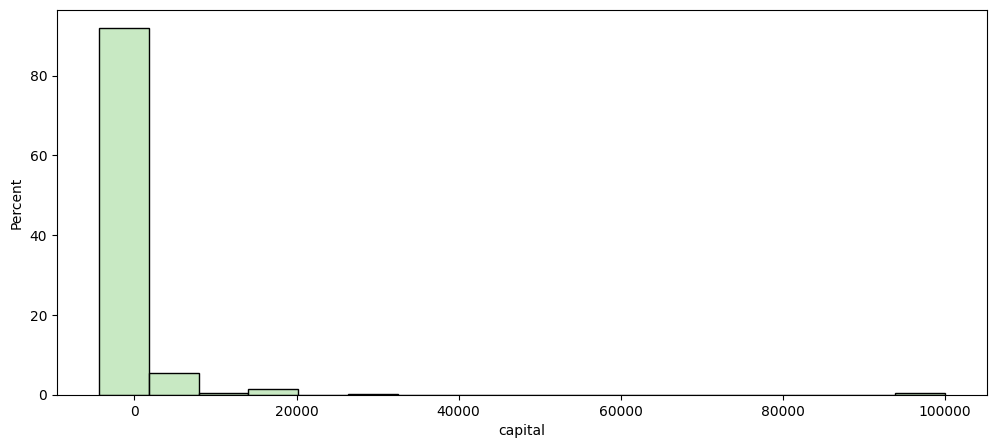

In [151]:
plt.figure(figsize=(12,5))
sns.histplot(df, x="capital", color = colors[3], stat="percent")
save("capital_bar")

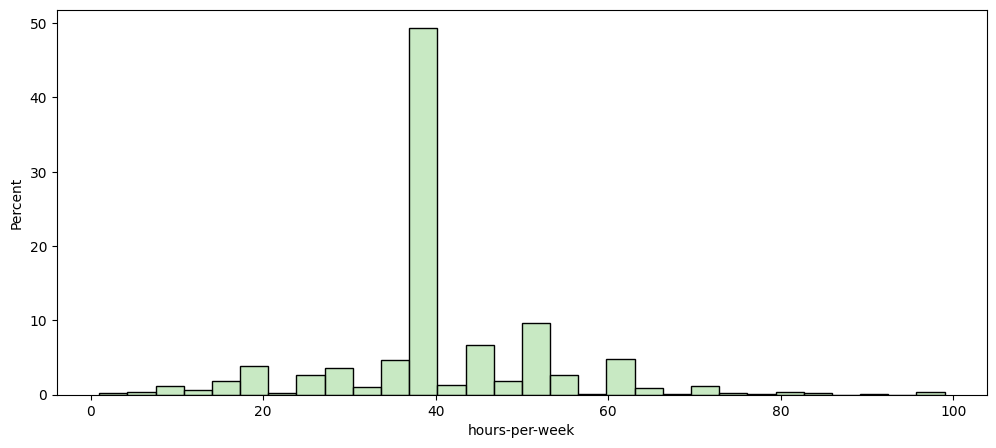

In [152]:
plt.figure(figsize=(12,5))
sns.histplot(df, x="hours-per-week", color = colors[3], stat="percent",
             bins=30)
save("hpw_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


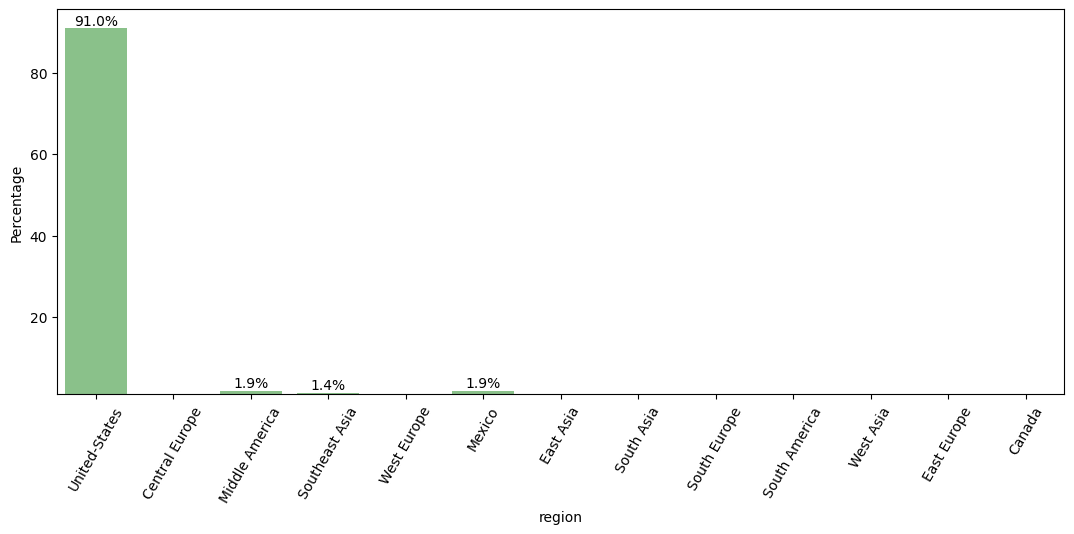

In [153]:
plt.figure(figsize=(13,5))
count_labels(df, "region", "percent", rotat=60)
save("region_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


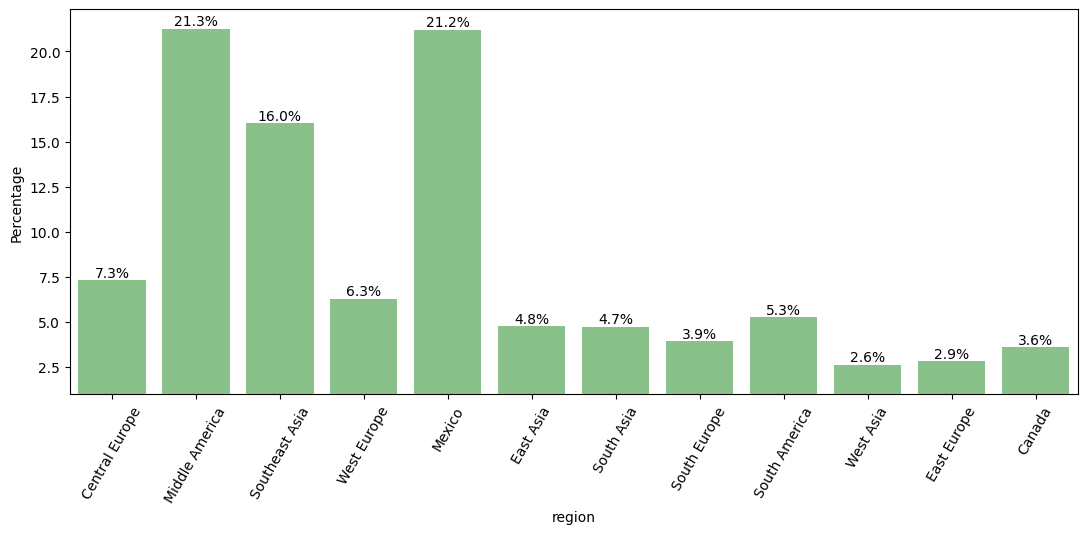

In [154]:
plt.figure(figsize=(13,5))
count_labels(df[df['region'] != 'United-States'], "region", "percent", rotat=60)
save("region_bar_no_usa")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


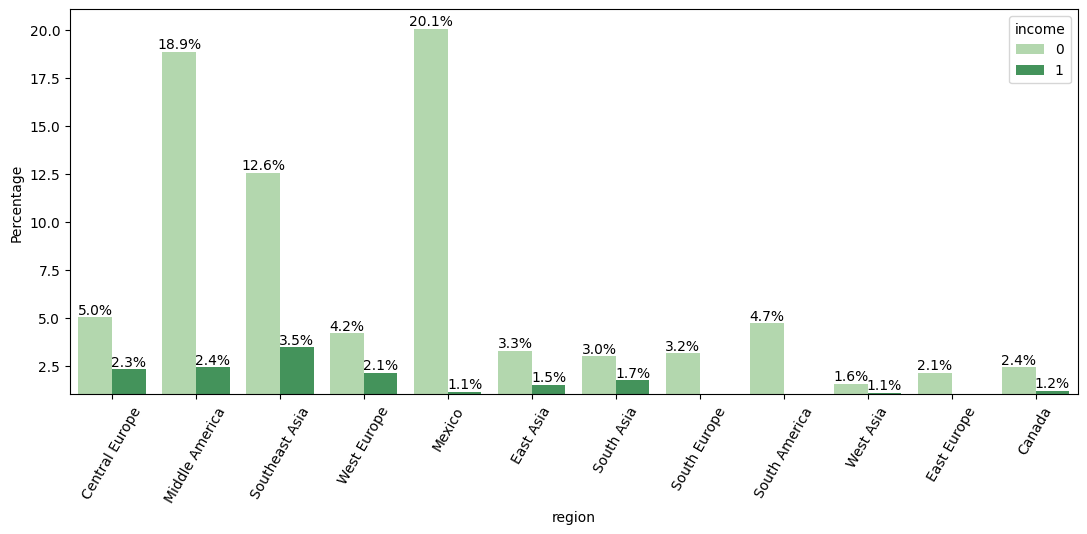

In [155]:
plt.figure(figsize=(13,5))
count_labels(df[df['region'] != 'United-States'], "region", "percent", rotat=60, 
             hue="income")
save("no_usa_region_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\2914378005.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


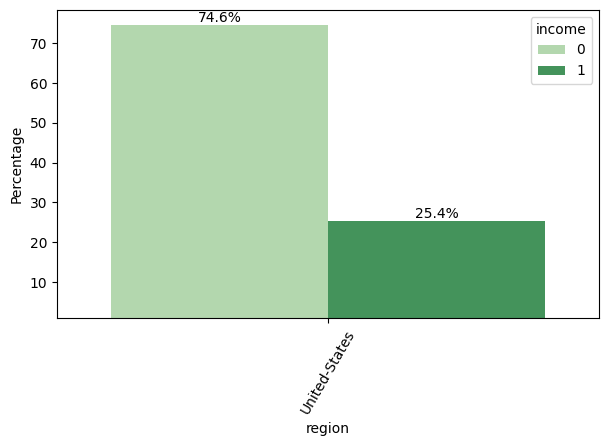

In [156]:
plt.figure(figsize=(7,4))
count_labels(df[df['region'] == 'United-States'], "region", "percent", rotat=60, 
             hue="income")
save("usa_region_income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\628597828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_raw, x="income", stat="percent", palette="Greens")


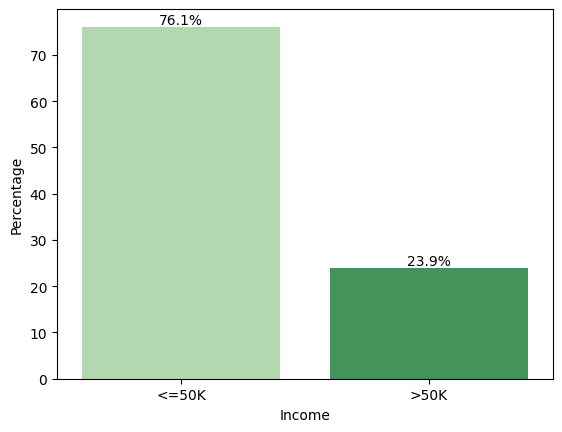

In [157]:
ax = sns.countplot(data=df_raw, x="income", stat="percent", palette="Greens")
plt.ylabel("Percentage")
plt.xlabel("Income")
#plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
save("distr_raw")

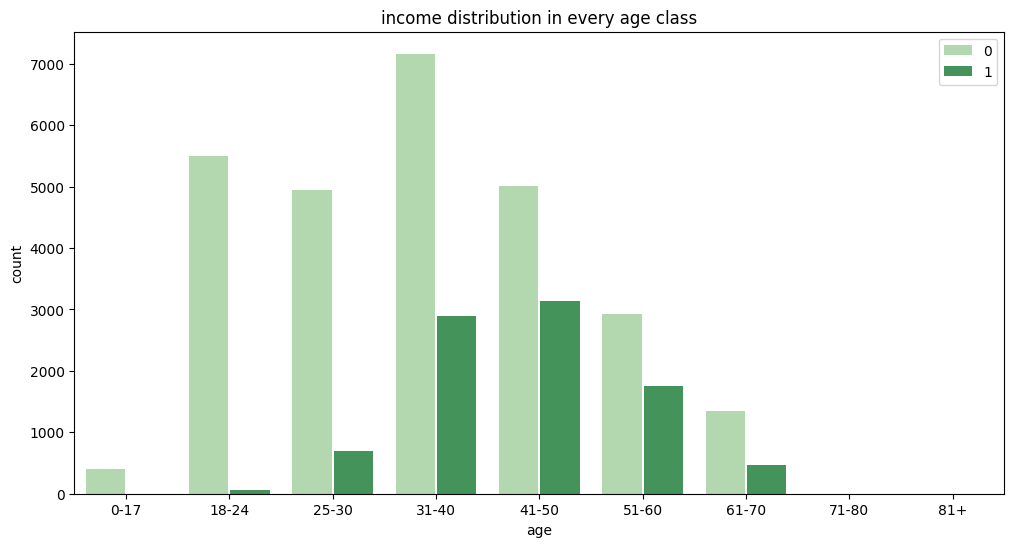

In [158]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71-80','81+']
count_compare_plot(df, column="age", compare_column="income", order=labels_age)

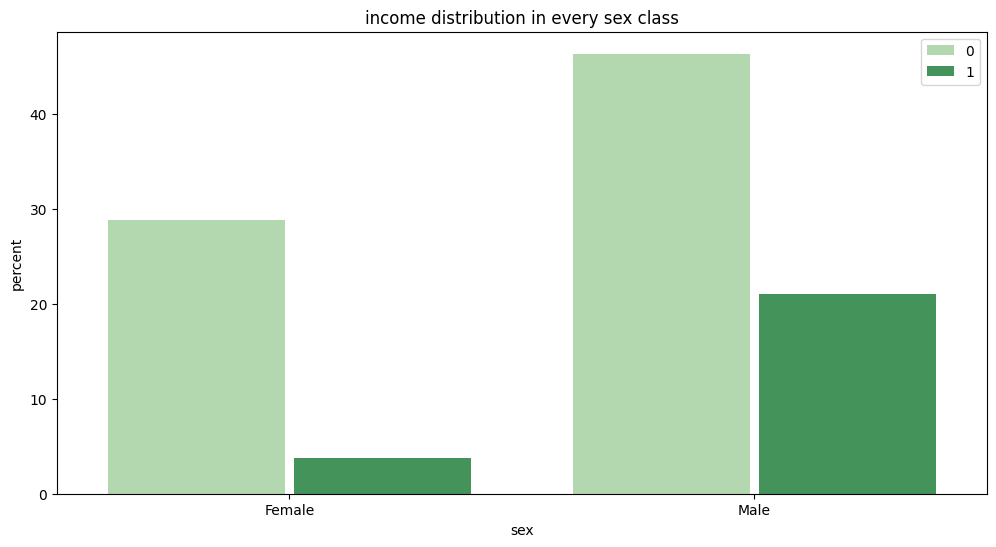

In [159]:
count_compare_plot(df, column="sex", compare_column="income", stat="percent")

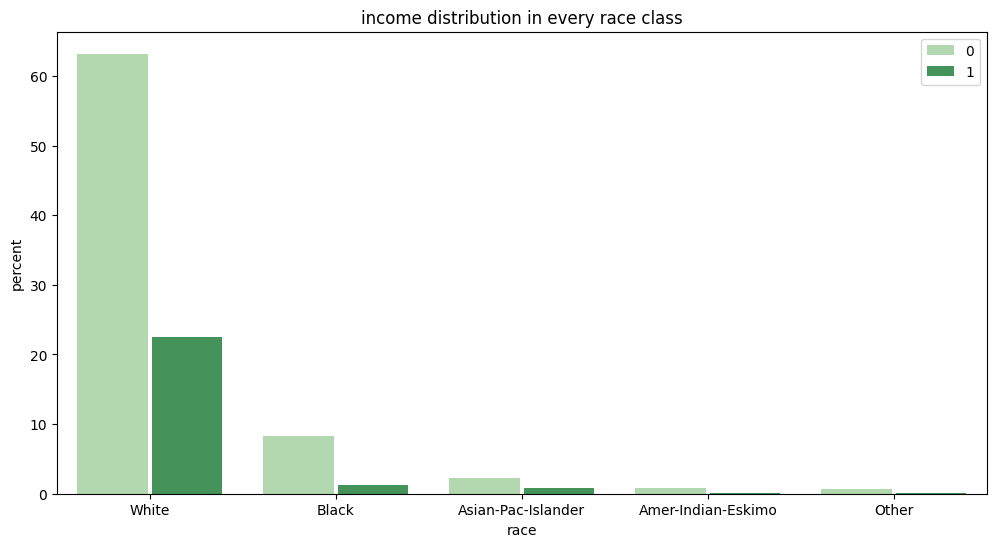

In [160]:
count_compare_plot(df, column="race", compare_column="income", stat="percent")

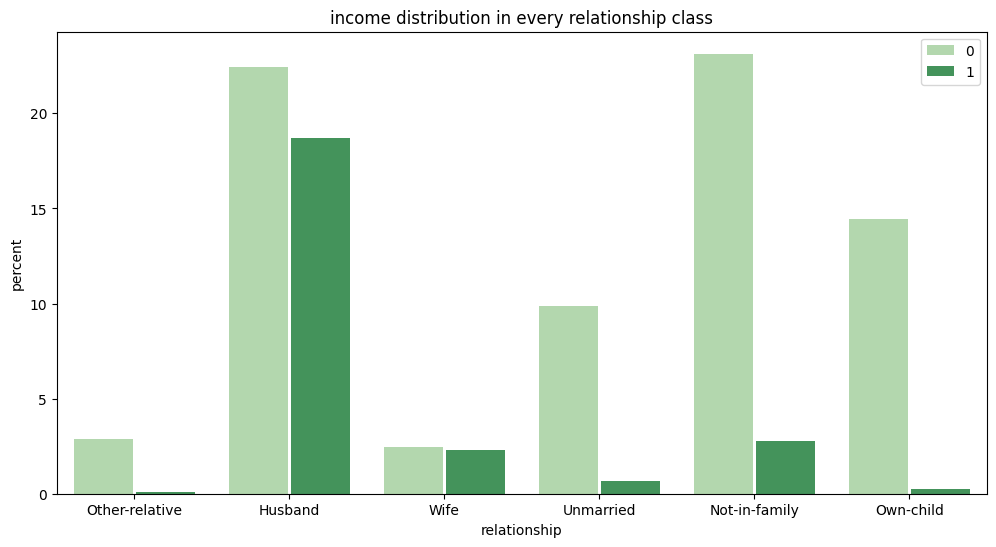

In [161]:
count_compare_plot(df, column="relationship", compare_column="income", stat="percent")

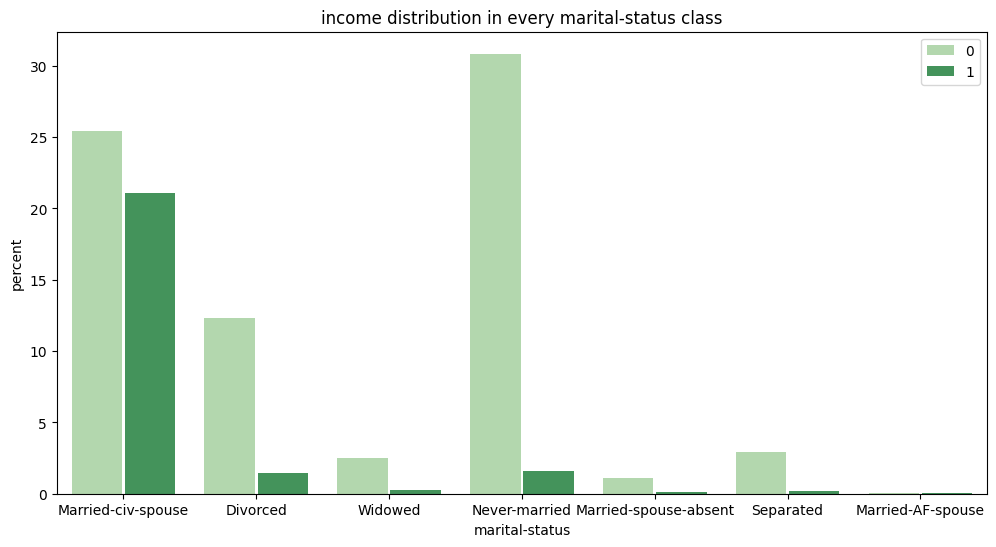

In [162]:
count_compare_plot(df, column="marital-status", compare_column="income", stat="percent")

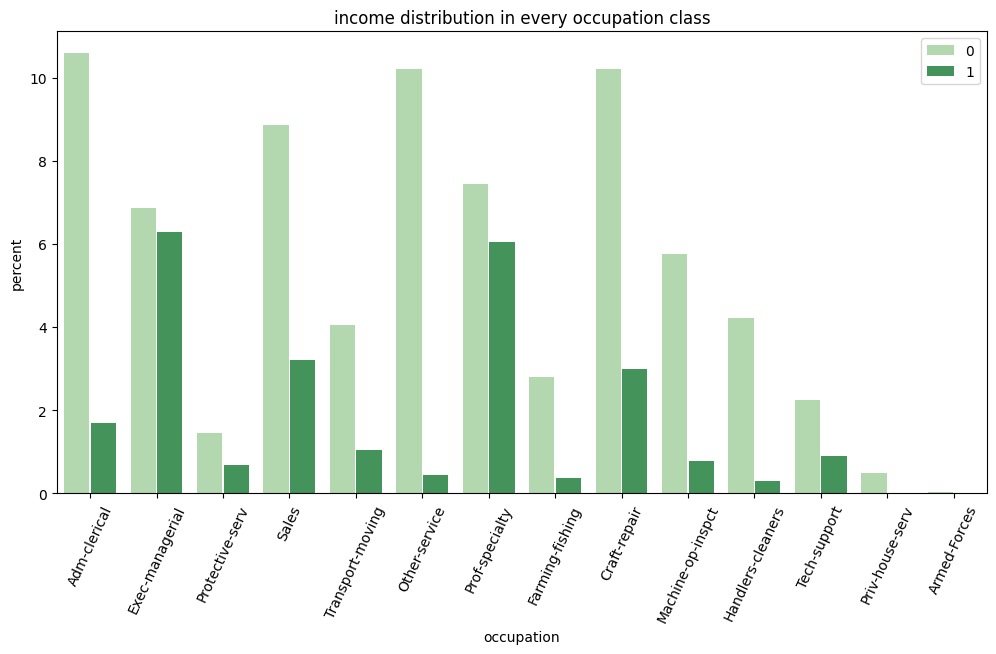

In [163]:
count_compare_plot(df, column="occupation", compare_column="income", stat="percent", rotation=65)

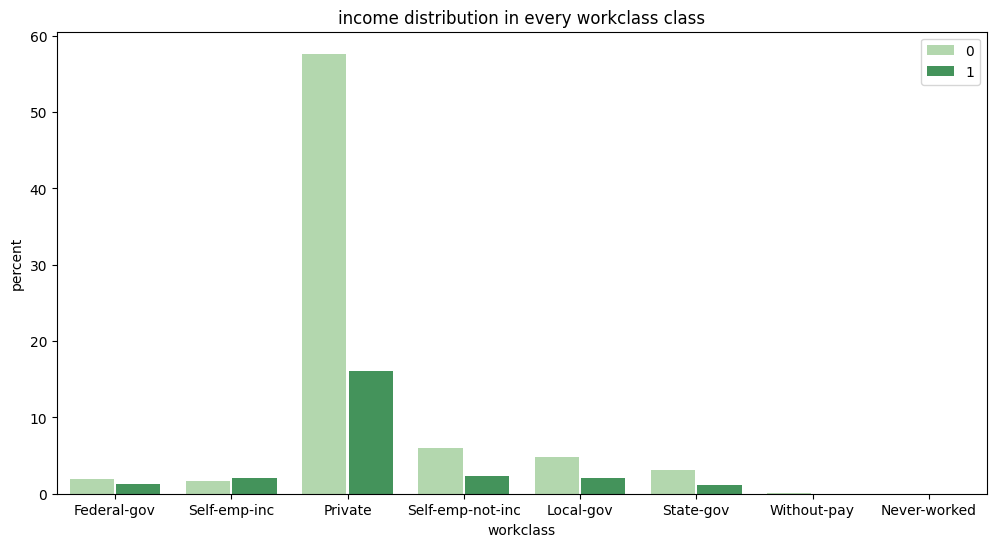

In [164]:
count_compare_plot(df, column="workclass", compare_column="income", stat="percent")

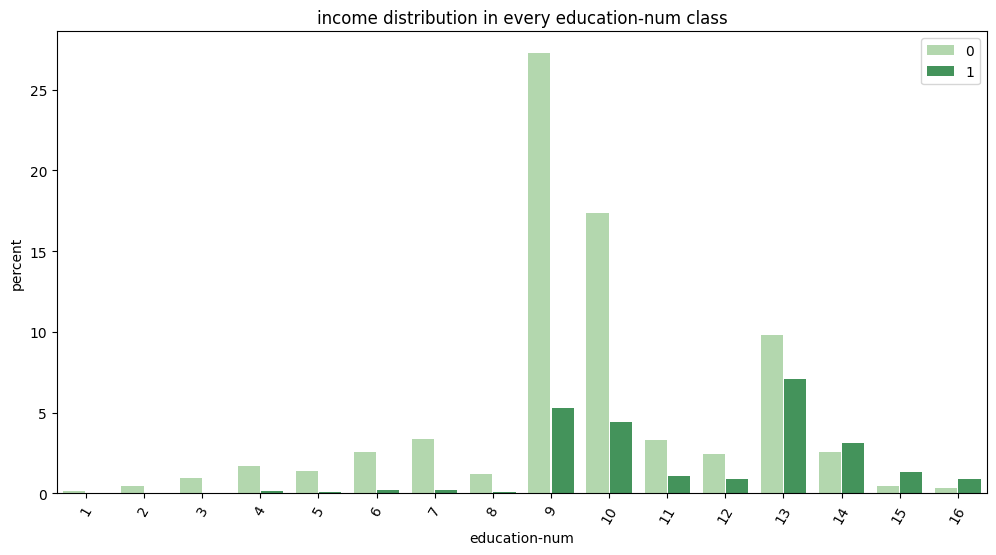

In [165]:
count_compare_plot(df, column="education-num", compare_column="income", stat="percent", rotation=60)

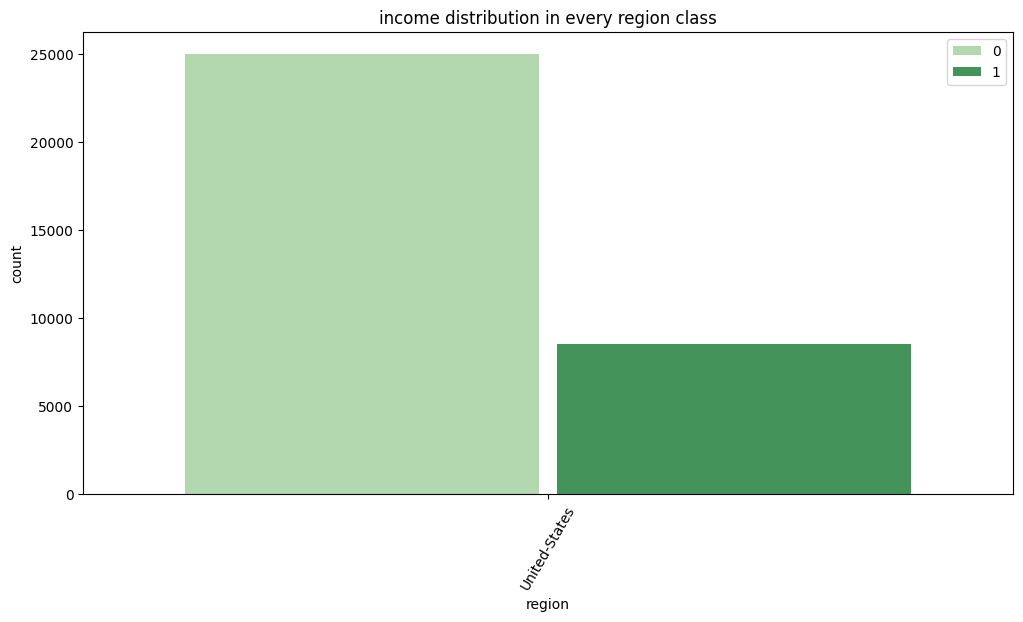

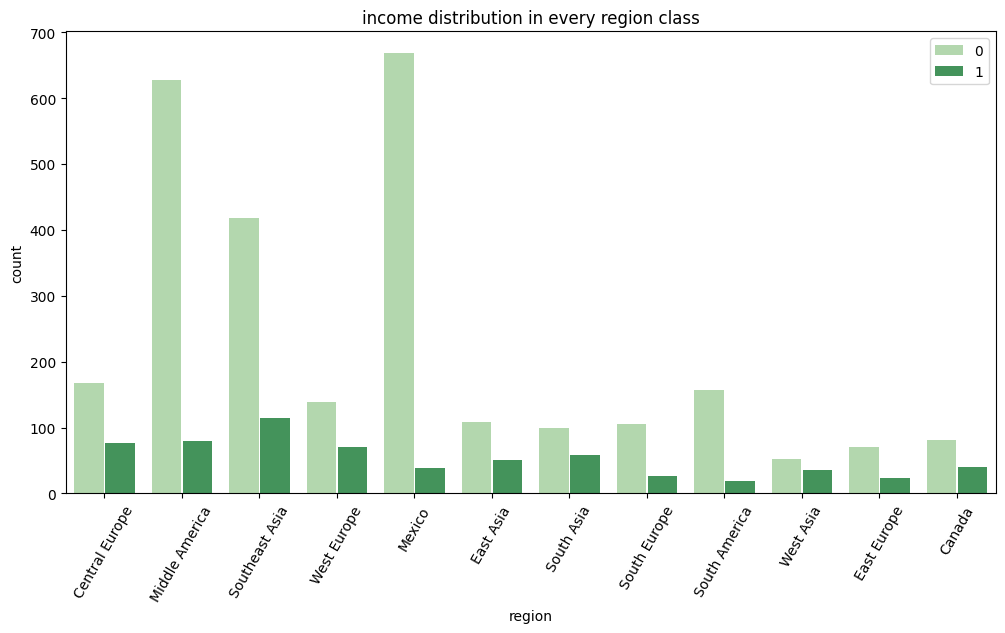

In [166]:
count_compare_plot(df[df["region"] =='United-States'], column="region", compare_column="income", stat="count", rotation=60)
count_compare_plot(df[df["region"] !='United-States'], column="region", compare_column="income", stat="count", rotation=60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1200x500 with 0 Axes>

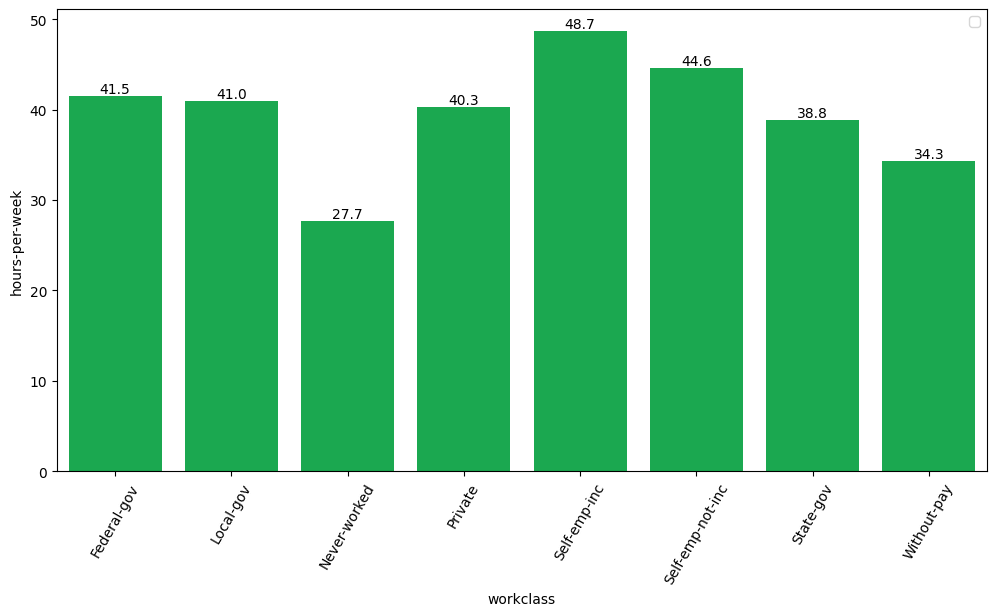

In [167]:
plt.figure(figsize=(12,5))
count_grouped_plot(df, "hours-per-week", "workclass")
save('mean_hours_workclass')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


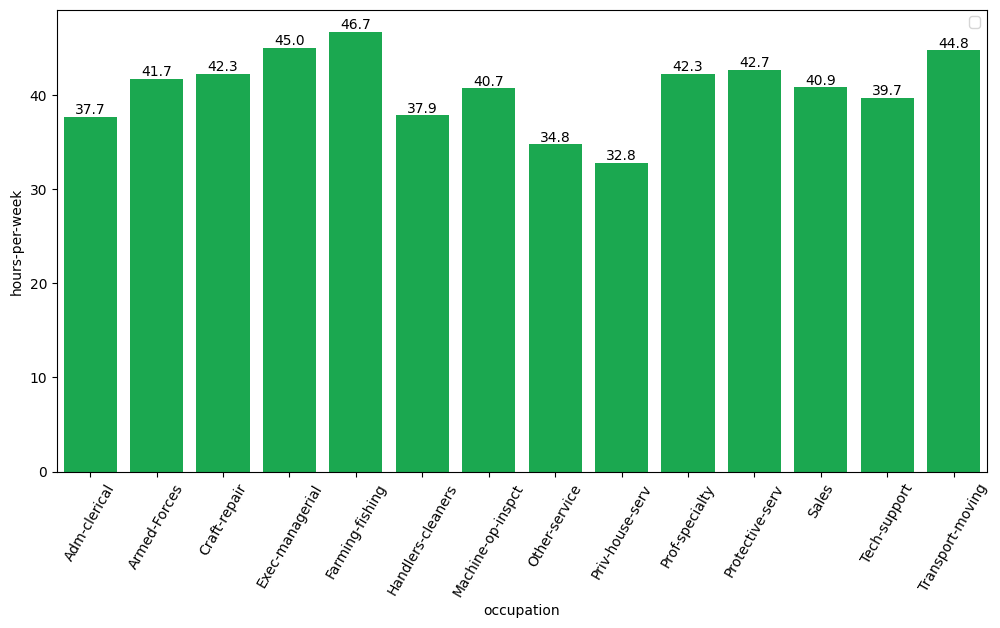

In [168]:
count_grouped_plot(df, "hours-per-week", "occupation")
save('mean_hours_occupation')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12380\157614950.py:2: UserWarning: 
The palette list has fewer values (1) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(df_raw, x='native-country', hue='native-country', palette=["#8ed08b"], legend=False)


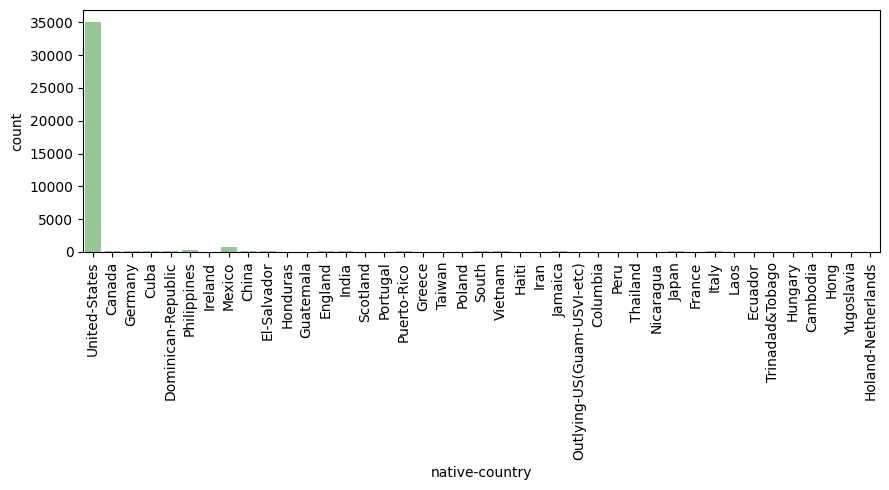

In [170]:
plt.figure(figsize=(9,5))
sns.countplot(df_raw, x='native-country', hue='native-country', palette=["#8ed08b"], legend=False)
plt.xticks(rotation=90)
plt.tight_layout()
save('native_raw')
plt.show()

In [171]:
weird_workclass = df[df['workclass'].isin(['Never-worked','Without-pay'])]

In [173]:
weird_workclass.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
689,25-30,Without-pay,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0.0,65.0,United-States,0
3672,71+,Without-pay,9,Married-civ-spouse,Other-service,Husband,White,Male,0.0,55.0,United-States,0
4710,71+,Without-pay,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,20.0,United-States,0
4974,18-24,Without-pay,9,Never-married,Craft-repair,Own-child,Black,Male,0.0,40.0,United-States,0
6016,51-60,Without-pay,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,30.0,United-States,0


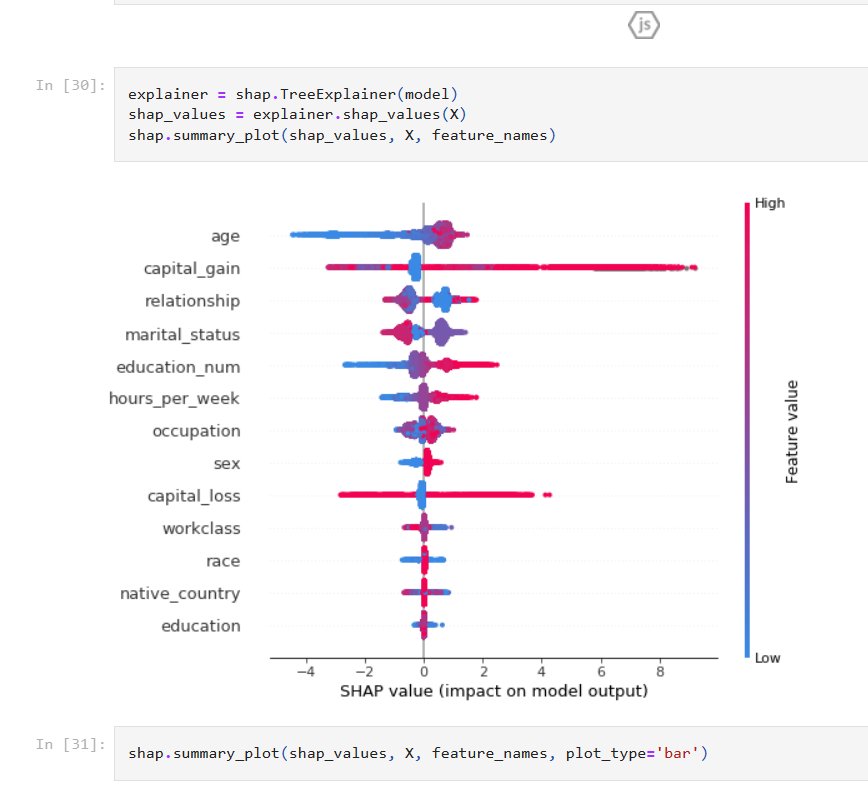

# never worked and without pay

In [174]:
file_path = Path('adults_data','adults_imputed_train_data.csv')
imputed = pd.read_csv(file_path)
"""imputed['income'] = imputed['income'].replace({0:"<=50K",
                                            1: ">50K"})"""

'imputed[\'income\'] = imputed[\'income\'].replace({0:"<=50K",\n                                            1: ">50K"})'

In [175]:
imputed[imputed['workclass'].isin(['Never-worked', 'Without-pay'])]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
689,25-30,Without-pay,10.0,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0.0,65.0,United-States,0
3672,71+,Without-pay,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,55.0,United-States,0
4710,71+,Without-pay,4.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,20.0,United-States,0
4974,18-24,Without-pay,9.0,Never-married,Craft-repair,Own-child,Black,Male,0.0,40.0,United-States,0
6016,51-60,Without-pay,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,30.0,United-States,0
7022,18-24,Without-pay,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,4416.0,40.0,United-States,0
8082,18-24,Never-worked,7.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,35.0,United-States,0
8562,41-50,Without-pay,9.0,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,-1887.0,40.0,United-States,1
10062,18-24,Without-pay,9.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,10.0,United-States,0
13022,31-40,Without-pay,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,40.0,United-States,0


In [176]:
imputed[imputed['workclass'].isin(['Without-pay'])]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
689,25-30,Without-pay,10.0,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0.0,65.0,United-States,0
3672,71+,Without-pay,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,55.0,United-States,0
4710,71+,Without-pay,4.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,20.0,United-States,0
4974,18-24,Without-pay,9.0,Never-married,Craft-repair,Own-child,Black,Male,0.0,40.0,United-States,0
6016,51-60,Without-pay,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,30.0,United-States,0
7022,18-24,Without-pay,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,4416.0,40.0,United-States,0
8562,41-50,Without-pay,9.0,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,-1887.0,40.0,United-States,1
10062,18-24,Without-pay,9.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,10.0,United-States,0
13022,31-40,Without-pay,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,40.0,United-States,0
16464,61-70,Without-pay,10.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,16.0,United-States,0


<Axes: xlabel='age', ylabel='count'>

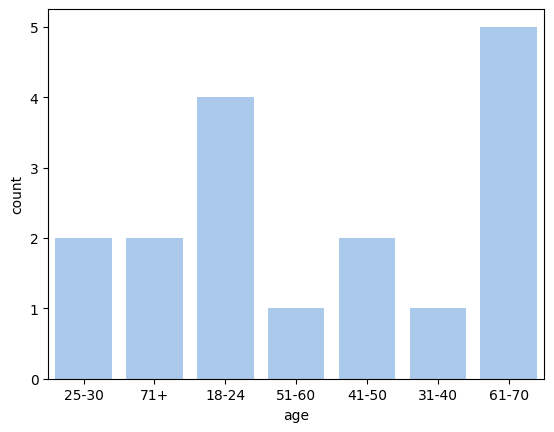

In [177]:
sns.countplot(data=imputed[imputed['workclass'].isin(['Without-pay'])], x='age')

In [178]:
imputed[imputed['workclass'].isin(['Never-worked'])]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
8082,18-24,Never-worked,7.0,Never-married,Farming-fishing,Own-child,White,Male,0.0,35.0,United-States,0
14037,18-24,Never-worked,7.0,Never-married,Other-service,Own-child,White,Female,0.0,10.0,United-States,0
22139,18-24,Never-worked,9.0,Married-spouse-absent,Handlers-cleaners,Other-relative,White,Male,0.0,35.0,United-States,0
22399,0-17,Never-worked,7.0,Never-married,Prof-specialty,Own-child,Black,Female,0.0,20.0,United-States,0
22847,18-24,Never-worked,10.0,Never-married,Other-service,Own-child,White,Male,0.0,4.0,United-States,0
26103,18-24,Never-worked,4.0,Divorced,Other-service,Not-in-family,White,Male,0.0,35.0,United-States,0
27918,18-24,Never-worked,6.0,Never-married,Priv-house-serv,Own-child,White,Male,0.0,40.0,United-States,0
29392,0-17,Never-worked,6.0,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,30.0,United-States,0
30720,18-24,Never-worked,10.0,Never-married,Farming-fishing,Own-child,Black,Male,0.0,40.0,United-States,0
